# Part I: Theory Questions

## k-Nearest Neighbor Classification

### Question 1:

#### 1. Assume that you have a large training dataset. Specify a disadvantage of the kNearest Neighbor method when using it during testing. State also your reason about your answer.

At Instance-based learning there is not actually a training process therefore testing is really expensive. The cost depends on the training data linearly because it has to find the distance between every data point.

#### 2. Create a 1-Dimensional classification dataset in which the 1-Nearest Neighbors method always gives a leave-one out cross validation error value of 1 (In other words, the method can’t guess correct class for a specific point in the dataset ). State also a proper explanation about your reasoning.


?????


#### 3. Assume that you have the following training set of positive (+), negative (-) instances and a single test instance (o) in the figure below (Figure 1). Assume also that the Euclidean metric is used for measuring the distance between instances. Finally consider that every nearest neighbor instance affects the final vote equally


Euclidian distance : dist((x, y), (a, b)) = √(x - a)² + (y - b)²

For K=1 { negative }
For K=3 { negative }
For K=5 { positive }

#### 4. Fill the blanks with T (True) or F (False) for the statements below:

T
T
T

## Lineer Regression


### Answer 1:

Since , normalized x=(x−u)/s
where

u = mean of the feature x,
s = range(max−min) or standard deviation

#### 92-45 = 47 = s
####  u = 71
#### x(2) = (70-71)/47
#### = -0.0212

### Answer 2:


#### vertical offsets.
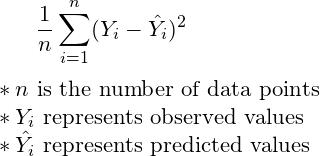

Because we use  Y axis which is dependent 

# PART II:Movie Recommendation System

In this assignment, we have implement a nearest neighbor algorithm to recommend movies to
viewers best suited to their tastes and traits. We have implemented a Knn algorihtm to find sets of similiar users based on common movie ratings, and make predictions using the average rating of the top-k nearest neighbours.

It is provided with a movie ratings dataset of 100.000 ratings of 9.000 movies by
600 users. The ratings are on a scale between 0 to 5. Our algorithm will try to make
predictions using the average rating of top-k nearest neighbors.

### Collaborative Filtering

Collaborative filtering based systems collect and analyze users’ behavioral information in
the form of their feedback, ratings, preferences and activities. Based on this information,
these systems then exploit similarities amongst several users/ items to predict missing
ratings and hence make suitable recommendations. They can discover and learn features
on its own without the need of explicit features to profile items or users. Types of
collaborative filtering are usually grouped into two as:

• User-based collaborative filtering

• Item-based collaborative filtering

A dataset is provided for your training phase in the Piazza. The validation set will be
provided later and announced from Piazza group. Since validation set will be provided
later, you should use a subset of the training set to test the performance of your model.
In other words, you should split your training dataset into two : the training set which
will be used to learn model and the test set which will be used to measure the success
of your model. You can use k-fold cross-validation method which is explained in the
class. You should also state your details about each model’s accuracy, model
accuracies with respect to different k parameters you chosen and how you
choose the final accuracy in your report.

### Dataset

MovieLens is a movie rating dataset compiled by GroupLens Resource Team [1]. As
mentioned before, you have given the small version of the dataset which contains 100.000
ratings of 9.000 movies by 600 users. The ratings are on a scale from 0 to 5.

• The dataset consists of four tables: ratings, movies, links and tags info.

• The ratings data set provides a list of ratings that users have given to books. It
includes 100.837 records and 4 fields: ”userId”, ”movieId”, ”rating”, ”timestamp”.

• The movies dataset provides movie details. It includes 9.743 records and 3 fields:
”movieId”, ”title” and ”genres”.

• The links dataset provides id details. It includes 9.743 records and 3 fields:
”movieId”, ”imdbId” and ”tmdbId”.

• The tags dataset provides tag details. It includes 3.684 records and 4 fields:
”userId”, ”movieId”, ”tag” and ”timestamp”.

## Data Types

### original

It stores the original ratings rather then the correlations. I use this to acces the original ratings for calculating the prediction

### df

It stores the correlations. I use this to  calculate the N similiar Neighbours

### ratingWithMinus

It stores the userIds and the movieIds which we have to predict.

### the

It is the np array version of the df

## Test, Train Split

I used %10 as test and %90 as train

## Distance Metric

I dont know why but cosine similarity gave really bad results in my data. Therefore I decided to use Euclidian Distance

#### I used the correlation of the users ratings, instead of actual users ratings by making a bit research.

In [1]:
import pandas as pd 
import numpy as np

from scipy import spatial
from collections import OrderedDict
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('ratings_train.csv')
dfsample = df.sample(frac=0.1)
Yrating = dfsample['rating'].values
YmovId = dfsample['movieId'].values
YuserId = dfsample['userId'].values

df = df.drop(dfsample.index) 
print(dfsample)

Ratings = df
original = df
#I used the correlation of the users ratings, instead of actual users ratings by making a bit research.
Mean = Ratings.groupby(by="userId",as_index=False)['rating'].mean()
Rating_avg = pd.merge(Ratings,Mean,on='userId')
Rating_avg['corr']=Rating_avg['rating_x']-Rating_avg['rating_y']

#Filling the userIdList and movieIdList for get0 and met0 methods
df.sort_values(by=['userId'])
userIdList = list(OrderedDict.fromkeys(df['userId'].tolist()))
gf = df
gf.sort_values(by=['movieId'])
movieIdList = list(set(gf['movieId'].tolist()))
movieIdList.sort()

original.sort_values(by=['userId'])

df = pd.pivot_table(Rating_avg,values='corr',index='userId',columns='movieId')
original = pd.pivot_table(original,values='rating',index='userId',columns='movieId')

# Filling the NaN values by using averages.
df = df.fillna(df.mean(axis=0))
print("----\ndf\n----")
print(df)
original = original.fillna(original.mean(axis=0))
print("----\noriginal\n----")
print(original)

thelist = df.values.tolist()
the = np.array(thelist)
original = np.array(original.values.tolist())



       userId  movieId  rating   timestamp
25109     279     1258     5.0  1506394412
252         2    91658     2.5  1445714938
3901       50     1291     3.0  1527371937
18394     199      307     2.0   940372513
63707     597     1747     4.0   941559248
...       ...      ...     ...         ...
47225     448   114935     4.0  1460142912
20829     224     3361     4.0   971811933
37895     382   111360     3.5  1515250006
21293     226     6025     4.0  1096419853
28505     298    61255     1.5  1466277779

[7112 rows x 4 columns]
----
df
----
movieId    1         2         3         4         5         6         7       \
userId                                                                          
1       -0.368182 -0.091106 -0.368182 -0.716032 -0.578121 -0.368182 -0.447662   
2        0.314537 -0.091106 -0.293662 -0.716032 -0.578121  0.370858 -0.447662   
3        0.314537 -0.091106 -0.293662 -0.716032 -0.578121  0.370858 -0.447662   
5        0.256410 -0.091106 -0.293662 -0.

##### get0 and met0 methods
get0 and met0 funtions are used to acces the right location in the list. For example I acces items in linear form like [0,1,2,3,4,5,6] but the ids are not sequential. They go like [4,7,11,14,18,21] if i call get0(7) it returns 1, the actual location of that index.

In [2]:
def get0(userId):
    try:
        return userIdList.index(userId)
    except ValueError:
        return  0
def met0(movieId):
    try:
        return  movieIdList.index(movieId)
    except ValueError:
        return  0

#### similiarity
It calculates the euclidian distance between all users and the given user. It sortes the index and returns first N of them.
#### find
It calculates the rate by getting the weighted average of the N nearest users rate on that movie.

In [3]:
def similarity(userId,N):
    simList = [0]*(the.shape[0])
    for i in range(the.shape[0]):
        simList[i] = spatial.distance.euclidean(the[get0(userId)],the[i]) 
    NsimilarByIndex = np.argsort(simList)
    return NsimilarByIndex[0:N]

def find(userId,movieId,N):
    rate = 0.0
    thex = similarity(userId,N) 
    W = len(thex)
    sumOfAllW = W*(W+1)/2
    for i in thex:
       rate += original[i][met0(movieId)]*W
       W -= 1
    rate /= sumOfAllW
    return rate

In [4]:
def KNN(N):
    rateList = dfsample.values.tolist()
    Ypredicted = [0]*len(rateList)
    count = 0
    for i in rateList:
        Ypredicted[count] = find(int(i[0]),int(i[1]),N)
        count +=1
#     print(Ypredicted[35:45])
    return mean_absolute_error(Yrating, Ypredicted)

In [5]:
print(KNN(1))


0.780189352376113


In [6]:
print(KNN(5))

0.7783119798278626


In [7]:
print(KNN(15))

0.7783239022313048


In [8]:
print(KNN(25))

0.7783001977520693


In [ ]:
print(KNN(50))

In [ ]:
print(KNN(100))

### Conclusion

My Algorithm gave the best result in 100-Nearest Reighbours which is 0.7810381476726521
In that assignment I learned a lot about Collaborative filtering methods.

##                          $$\\Ismet\\OKATAR\\21727542$$